# Load Data

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home="./data")

In [2]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(mnist.data.shape[0], 10)):
    image = np.reshape(mnist.data[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
    array[int(i/5), i%5].set_title(mnist.target[index])
plt.show()

# Split data

In [4]:
import numpy as np

np.random.seed(123)

#Shuffle data
permutation = np.random.permutation(mnist.data.shape[0])
X = mnist.data[permutation]
y = mnist.target[permutation]

# Split data
N_train = 60000

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

# KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)

In [6]:
y_hat = model.predict(X_test[:1000])

# Evaluation

In [7]:
from sklearn import metrics

print("Test accuracy: ", metrics.accuracy_score(y_test[:1000], y_hat))

Test accuracy:  0.977


## Check Random Sample Along Their Results

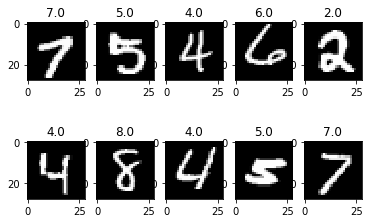

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(X_test[:1000].shape[0], 10)):
    image = np.reshape(X_test[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
    array[int(i/5), i%5].set_title(y_hat[index])
plt.show()

## What Is Wrong? :D

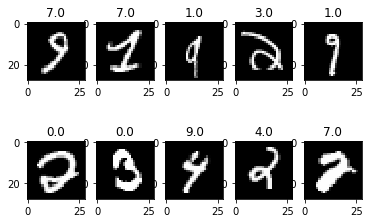

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(X_test[:1000].shape[0], 10)):
    while y_hat[index] == y_test[index]:
        index = np.random.choice(X_test[:1000].shape[0])
    image = np.reshape(X_test[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
    array[int(i/5), i%5].set_title(y_hat[index])
plt.show()